In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [42]:
df=pd.read_csv("exercise_data.csv")
df.head()

,Unnamed: 0,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,14733363,NaN,68,190,94,29,105,40.8,231
1,1,14861698,NaN,20,166,60,14,94,40.3,66
2,2,11179863,NaN,69,179,79,5,88,38.7,26
3,3,16180408,NaN,34,179,71,13,100,40.5,71
4,4,17771927,NaN,27,154,58,10,81,39.8,35


In [43]:
df=df.drop(['Unnamed: 0'], axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,NaN,68,190,94,29,105,40.8,231
1,14861698,NaN,20,166,60,14,94,40.3,66
2,11179863,NaN,69,179,79,5,88,38.7,26
3,16180408,NaN,34,179,71,13,100,40.5,71
4,17771927,NaN,27,154,58,10,81,39.8,35


In [44]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,NaN,68,190,94,29,105,40.8,231
1,14861698,NaN,20,166,60,14,94,40.3,66
2,11179863,NaN,69,179,79,5,88,38.7,26
3,16180408,NaN,34,179,71,13,100,40.5,71
4,17771927,NaN,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11


<Axes: ylabel='Height'>

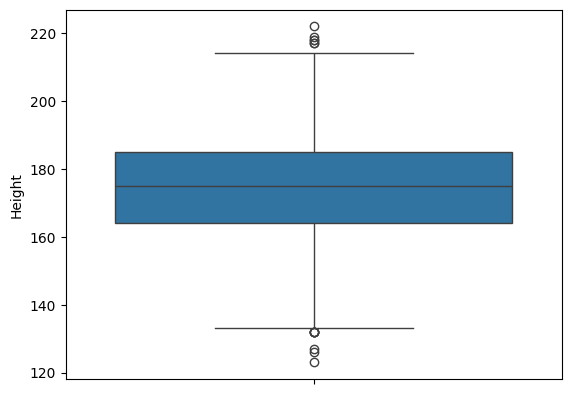

In [45]:
sns.boxplot(df['Height'])

<Axes: ylabel='Height'>

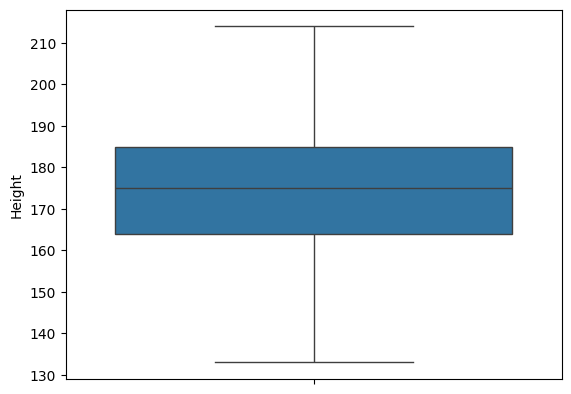

In [46]:
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['Height'] >= lower_bound) & (df['Height'] <= upper_bound)]

sns.boxplot(df_filtered['Height'])

<Axes: ylabel='Age'>

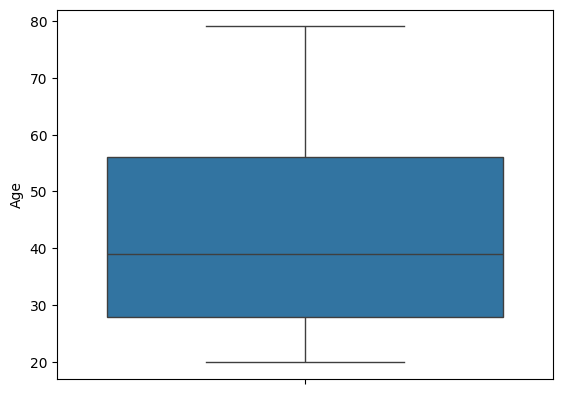

In [47]:
sns.boxplot(df['Age'])

<Axes: ylabel='Heart_Rate'>

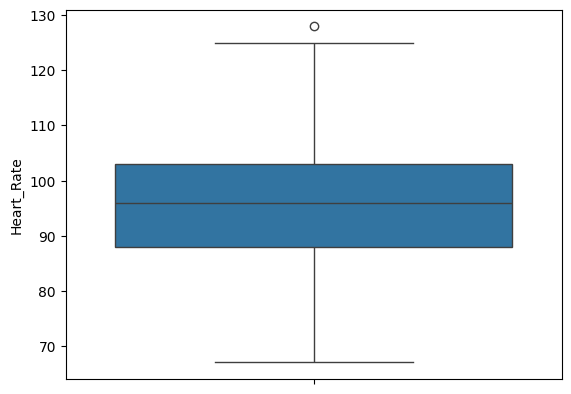

In [48]:
sns.boxplot(df['Heart_Rate'])

In [49]:
df.isnull().sum()

User_ID        0
Gender        52
Age            0
Height         0
Weight         0
Duration       0
Heart_Rate     0
Body_Temp      0
Calories       0
dtype: int64

In [50]:
df.isnull().sum().sum()

52

In [51]:
df.shape

(15000, 9)

Fill Null Values

In [52]:
df['Gender'].fillna(statistics.mode(df['Gender']), inplace=True)

In [53]:
df.isnull().sum().sum()

0

# Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [55]:
df['Gender']=le.fit_transform(df['Gender'])

In [56]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,0,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,0,34,179,71,13,100,40.5,71
4,17771927,0,27,154,58,10,81,39.8,35


In [57]:
df['Gender'].value_counts()

Gender
0    7578
1    7422
Name: count, dtype: int64

# Dependent and Independent Data

In [58]:
X=df.drop('Calories',axis=1)
y=df[['Calories']]

In [59]:
print("shape of X ",X.shape)
print("shape of y ",y.shape)

shape of X  (15000, 8)
shape of y  (15000, 1)


# Split Train and Test Data

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=51)

In [61]:
print("shape of X_train",X_train.shape)
print("shape of X_test ",X_test.shape)
print("shape of y_train ",y_train.shape)
print("shape of y_test ",y_test.shape)

shape of X_train (10500, 8)
shape of X_test  (4500, 8)
shape of y_train  (10500, 1)
shape of y_test  (4500, 1)


## Linear Regression Model

In [62]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [63]:
lr.fit(X_train,y_train)

LinearRegression()

In [64]:
lr.score(X_test,y_test)

0.9657625780202699

# Evaluation Metrics

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [66]:
y_pred=lr.predict(X_test)

In [67]:
y_test

,Calories
10995,94
1277,101
12835,90
2296,76
1926,131
...,...
8161,82
11651,34
2072,28
1603,147


In [68]:
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

Mean Squared Error=  131.32014060198813


In [69]:
print("Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))

Mean Absolute Error=  8.458917999012137


In [70]:
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error=  11.459500015357918


In [71]:
print("R2 Score = ",r2_score(y_test,y_pred))

R2 Score =  0.9657625780202699


# Decision Tree Regression

In [72]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='squared_error')

In [73]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [74]:
regressor.score(X_test,y_test)

0.9919551935872467

# Random Forest Regression

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=70,criterion = 'squared_error')

In [76]:
rf.fit(X_train,y_train)

<ipython-input-76-d6d9475b85dc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestRegressor(n_estimators=70)

In [77]:
rf.score(X_test,y_test)

0.9973193770437737

# Evaluation Metrics

In [78]:
y_pred=rf.predict(X_test)

In [79]:
y_test

,Calories
10995,94
1277,101
12835,90
2296,76
1926,131
...,...
8161,82
11651,34
2072,28
1603,147


In [80]:
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

Mean Squared Error=  10.281725759637188


In [81]:
print("Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))

Mean Absolute Error=  1.9476730158730158


In [82]:
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error=  3.206513021903574


In [83]:
print("R2 Score = ",r2_score(y_test,y_pred))

R2 Score =  0.9973193770437737


# KNN Regression

In [84]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=2)

In [85]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [86]:
knn.score(X_test,y_test)

-0.5292619113730559

# Regulation L1 & L2

In [87]:
from sklearn.linear_model import Ridge,Lasso

In [88]:
rd=Ridge()
rd.fit(X_train,y_train)
rd.score(X_test,y_test)

0.965762295696077

In [89]:
la=Lasso()
la.fit(X_train,y_train)
la.score(X_test,y_test)

0.9627233276188208

In [90]:
rd2=Ridge(alpha=2)
rd2.fit(X_train,y_train)
rd2.score(X_test,y_test)

0.9657620009359028

In [91]:
ls2=Lasso(alpha=4)
ls2.fit(X_train,y_train)
ls2.score(X_test,y_test)

0.9569069613161632

# K Fold

In [92]:
from sklearn.model_selection import cross_val_score

In [105]:
score_rf=cross_val_score(RandomForestRegressor(n_estimators=50),X_train,y_train,cv=3)
print(score_rf)
print("avg",np.average(score_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.99728221 0.99599783 0.99687733]
avg 0.9967191216320747


In [102]:
score_dt=cross_val_score(DecisionTreeRegressor(criterion='squared_error'),X_train,y_train,cv=2)
print(score_dt)
print("avg",np.average(score_dt))


[0.98813969 0.98781219]
avg 0.9879759441899878
